# Init

In [1]:
import torch
from torch import nn
from jlib.classifier import Classifier
from jlib.get_shakespeare_loaders import get_shakespeare_loaders

models = []
datas = []
text = ""
with open('data/sequence.txt', 'r') as f:
    text = f.read()

class ShakespeareRNN(Classifier):
    def __init__(self, alphabet_size, hidden_size, rnn=nn.RNN, linear_network=[], learning_rate = 1e-2, sequence_length = 20, dropout=0.3):
        super().__init__()
        self.learning_rate = learning_rate
        self.sequence_length = sequence_length
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(alphabet_size, hidden_size)
        self.rnn = rnn(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Sequential()
        linear_in = hidden_size
        linear_out = alphabet_size
        for i, layer_size in enumerate(linear_network):
            self.fc.add_module(f'linear_{i}', nn.Linear(linear_in, layer_size))
            self.fc.add_module(f'batchnorm_{i}', nn.BatchNorm1d(layer_size))
            self.fc.add_module(f'relu_{i}', nn.ReLU())
            self.fc.add_module(f'dropout_{i}', nn.Dropout(dropout))
            linear_in = layer_size
        self.fc.add_module('final_linear', nn.Linear(linear_in, linear_out))
        
    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])  # Get the output of the last RNN cell
        return x

def train_and_plot(train, val, model: ShakespeareRNN, name, *training_args, **training_kwargs):
    print(f"Training {name}")
    param_count = sum(p.numel() for p in model.parameters())
    print(f"Model has {param_count} parameters")
    model.train_model(
        *training_args,
        **training_kwargs,
        train_loader=train,
        val_loader=val,
    )
    fig = model.plot_training(f"{name} Training")
    fig.savefig(f"images/{name}_training_new.png")
    print(f"Model has {param_count} parameters")
    model.train_model(*training_args, **training_kwargs)
    fig = model.plot_training(f"{name} Training")
    fig.savefig(f"images/{name}_training_new.png")



/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data 20

In [2]:
for data in datas:
    del data
data_20 = get_shakespeare_loaders(
    train_batch_size=2**13,
    val_batch_size=2**13,
    sequence_length=20,
)
datas.append(data_20)

Train GPU Prefetch: 3200.0
Train CPU Prefetch: 320.0
Val GPU Prefetch: 1600.0
Val CPU Prefetch: 320.0
Train Loader
Begin init data loader
Batch Size: 1.25 MiB
Data Loader init time: 3.073705 s
Begin init fetcher
Fetcher init time: 3.451331 s
Val Loader
Begin init data loader
Batch Size: 1.25 MiB
Data Loader init time: 0.752329 s
Begin init fetcher
Fetcher init time: 1.016937 s


# LSTM 20

In [3]:


for model in models:
    del model

lstm20 = ShakespeareRNN(
    alphabet_size=len(data_20['chars']),
    hidden_size=128,
    rnn=nn.LSTM,
).to('cuda')
models.append(lstm20)
train_and_plot(
    data_20['train_loader'],
    data_20['val_loader'],
    lstm20,
    "LSTM-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

Training LSTM-20
Model has 148801 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      8.372418      |      2.843712      |      2.348663      |     -17.408565     |     33.748739      |      0.000000      |    3.035016e-07    |      2.393922      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      5.397358      |      2.209875      |      2.092479      |     -5.312348      |     39.935896      |     18.333001      |    1.587409e-07    |      2.579468      |
---------------------------------------------

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ffa8dc9ad50>>
Traceback (most recent call last):
  File "/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt
: Exception in thread Thread-16 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/home/jaskin/Intro_Dee

KeyboardInterrupt: 

# LSTM-Adjusted-20

Training LSTM-Adjusted-20
Model has 113093 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |     15.754908      |      2.210250      |      1.792048      |     -18.921003     |     46.959543      |      0.000000      |    4.995103e-07    |      1.932464      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      8.747782      |      1.822340      |      1.635745      |     -10.239322     |     51.060406      |      8.732757      |    3.662619e-07    |      2.118010      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 113093 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

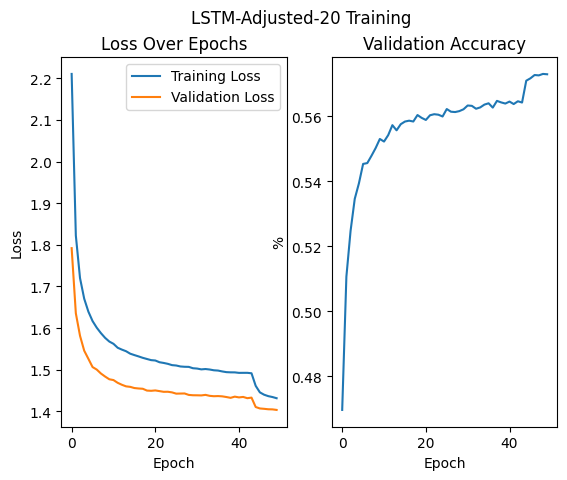

In [3]:
for model in models:
    del model

lstm_adj_20 = ShakespeareRNN(
    alphabet_size=len(data_20['chars']),
    hidden_size=100,
    rnn=nn.LSTM,
    linear_network=[128,64],
    dropout=0.3
).to('cuda')
models.append(lstm_adj_20)
train_and_plot(
    data_20['train_loader'],
    data_20['val_loader'],
    lstm_adj_20,
    "LSTM-Adjusted-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.01},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)
# increased learning rate due to drop out

# GRU-20

Training GRU-20
Model has 115777 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      9.175223      |      2.734731      |      2.274629      |     -16.824417     |     36.099966      |      0.000000      |    1.963046e-07    |      2.266477      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      5.298056      |      2.132231      |      2.015338      |     -5.482191      |     41.833912      |     15.883522      |    1.812731e-07    |      2.453976      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 115777 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

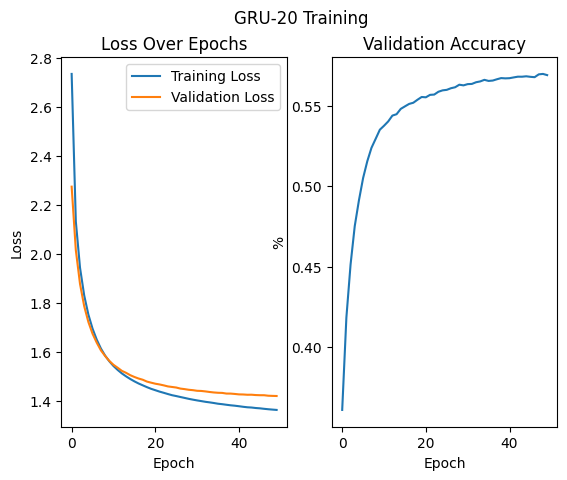

In [3]:
for model in models:
    del model

gru_20 = ShakespeareRNN(
    alphabet_size=len(data_20['chars']),
    hidden_size=128,
    rnn=nn.GRU,
).to('cuda')
models.append(gru_20)
train_and_plot(
    data_20['train_loader'],
    data_20['val_loader'],
    gru_20,
    "GRU-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# GRU-Adjusted-20

Training GRU-Adjusted-20
Model has 176477 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      8.834196      |      2.052997      |      1.694339      |     -17.469942     |     49.255632      |      0.000000      |    3.727848e-07    |      1.829890      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      6.296373      |      1.693039      |      1.581314      |     -6.599079      |     52.291382      |      6.163255      |    2.369741e-07    |      2.017390      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 176477 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

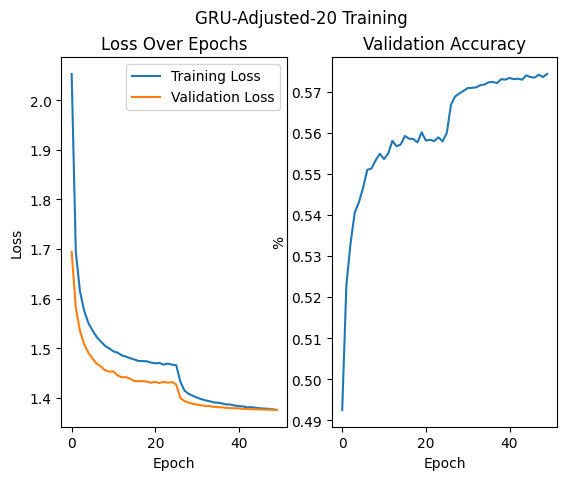

In [3]:
for model in models:
    del model

gru_adj_20 = ShakespeareRNN(
    alphabet_size=len(data_20['chars']),
    hidden_size=100,
    rnn=nn.GRU,
    linear_network=[256,256],
    dropout=0.3
).to('cuda')
models.append(gru_adj_20)
train_and_plot(
    data_20['train_loader'],
    data_20['val_loader'],
    gru_adj_20,
    "GRU-Adjusted-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.01},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# Data-30

In [2]:
for data in datas:
    del data

data_30 = get_shakespeare_loaders(
    train_batch_size=2**13,
    val_batch_size=2**14,
    sequence_length=20,
)
datas.append(data_30)

Train GPU Prefetch: 3200.0
Train CPU Prefetch: 320.0
Val GPU Prefetch: 800.0
Val CPU Prefetch: 160.0
Train Loader
Begin init data loader
Batch Size: 1.25 MiB
Data Loader init time: 3.907855 s
Begin init fetcher
Fetcher init time: 4.250478 s
Val Loader
Begin init data loader
Batch Size: 2.5 MiB
Data Loader init time: 1.950313 s
Begin init fetcher
Fetcher init time: 2.193113 s


# LSTM-30

Training LSTM-30
Model has 148801 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |     11.191236      |      2.825303      |      2.344658      |     -17.012153     |     33.736636      |      0.000000      |    3.981310e-07    |      5.903687      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      5.676796      |      2.198852      |      2.085727      |     -5.144760      |     40.033621      |     18.665125      |    5.603821e-08    |      6.089234      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 148801 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

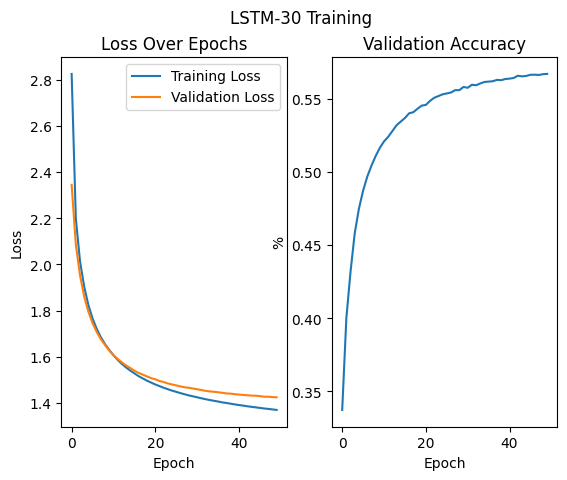

In [3]:
for model in models:
    del model


lstm30 = ShakespeareRNN(
    alphabet_size=len(data_30['chars']),
    hidden_size=128,
    rnn=nn.LSTM,
).to('cuda')
models.append(lstm30)
train_and_plot(
    data_30['train_loader'],
    data_30['val_loader'],
    lstm30,
    "LSTM-30",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# LSTM-Adjusted-30

Training LSTM-Adjusted-30
Model has 113093 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |     11.139800      |      2.205339      |      1.795600      |     -18.579398     |     46.499159      |      0.000000      |    4.119586e-07    |      3.309417      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      8.427531      |      1.820831      |      1.640758      |     -9.889594      |     51.020509      |      9.723508      |    1.549620e-07    |      3.494963      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 113093 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

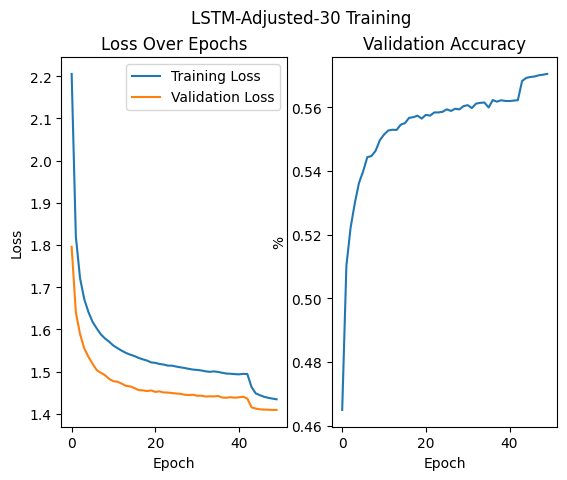

In [3]:
for model in models:
    del model
lstmadj_30 = ShakespeareRNN(
    alphabet_size=len(data_30['chars']),
    hidden_size=100,
    rnn=nn.LSTM,
    linear_network=[128,64],
    dropout=0.3
).to('cuda')
models.append(lstmadj_30)
train_and_plot(
    data_30['train_loader'],
    data_30['val_loader'],
    lstmadj_30,
    "LSTM-Adjusted-30",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.01},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# GRU-30

Training GRU-30
Model has 115777 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      8.650820      |      2.727378      |      2.272147      |     -16.691181     |     36.085173      |      0.000000      |    1.435001e-07    |      4.963742      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      5.455945      |      2.128140      |      2.015325      |     -5.301138      |     41.681049      |     15.507410      |    5.557695e-08    |      5.151242      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 115777 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

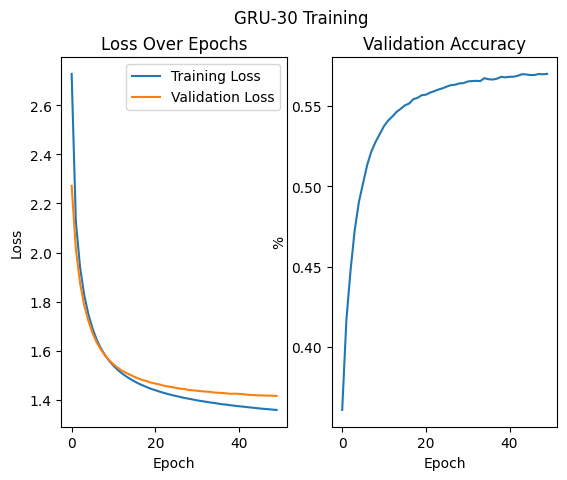

In [3]:
gru_30 = ShakespeareRNN(
    alphabet_size=len(data_30['chars']),
    hidden_size=128,
    rnn=nn.GRU,
).to('cuda')
models.append(gru_30)
train_and_plot(
    data_30['train_loader'],
    data_30['val_loader'],
    gru_30,
    "GRU-30",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# GRU-Adjusted-30

Training GRU-Adjusted-30
Model has 176477 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |     10.335475      |      2.047637      |      1.685785      |     -17.671702     |     49.632635      |      0.000000      |    1.927757e-07    |      2.888484      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      6.252898      |      1.690480      |      1.568208      |     -7.233000      |     52.393590      |      5.562781      |    1.130429e-07    |      3.074030      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 176477 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

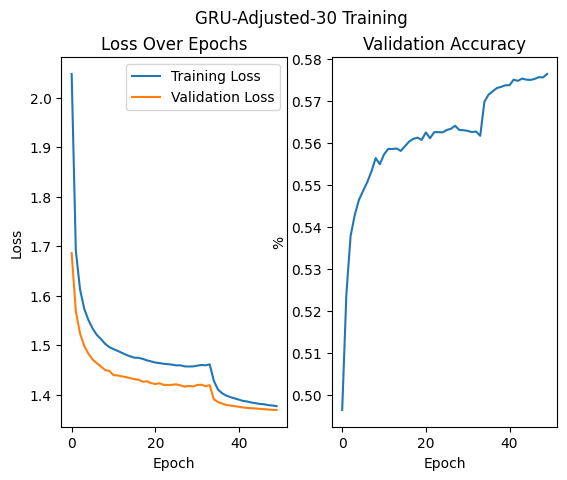

In [3]:
for model in models:
    del model
gru_adj_30 = ShakespeareRNN(
    alphabet_size=len(data_30['chars']),
    hidden_size=100,
    rnn=nn.GRU,
    linear_network=[256,256],
    dropout=0.3
).to('cuda')
models.append(gru_adj_30)
train_and_plot(
    data_30['train_loader'],
    data_30['val_loader'],
    gru_adj_30,
    "GRU-Adjusted-30",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.01},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# Data-50

In [2]:
for data in datas:
    del data

data_50 = get_shakespeare_loaders(
    train_batch_size=2**13,
    val_batch_size=2**13,
    sequence_length=20,
)
datas.append(data_50)

Train GPU Prefetch: 3200.0
Train CPU Prefetch: 320.0
Val GPU Prefetch: 1600.0
Val CPU Prefetch: 320.0
Train Loader
Begin init data loader
Batch Size: 1.25 MiB
Data Loader init time: 3.703878 s
Begin init fetcher
Fetcher init time: 4.126991 s
Val Loader
Begin init data loader
Batch Size: 1.25 MiB
Data Loader init time: 3.611634 s
Begin init fetcher
Fetcher init time: 4.193583 s


# LSTM-50

Training LSTM-50
Model has 148801 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      7.361336      |      2.840933      |      2.343398      |     -17.513081     |     34.112742      |      0.000000      |    2.883166e-07    |      5.903687      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      5.347061      |      2.196302      |      2.088018      |     -4.930302      |     40.057380      |     17.426443      |    4.325330e-08    |      6.089234      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 148801 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

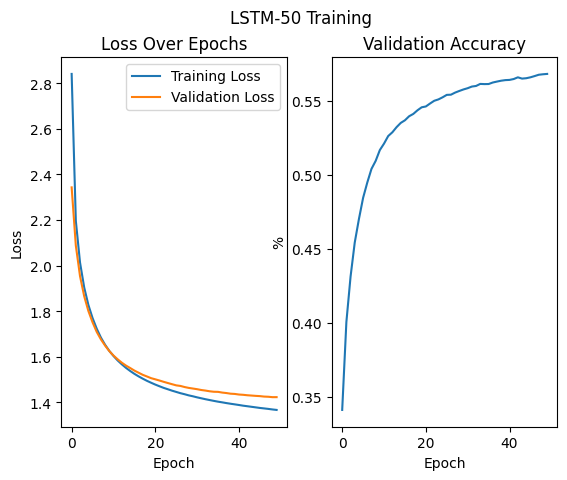

In [3]:
for model in models:
    del model
    
lstm50 = ShakespeareRNN(
    alphabet_size=len(data_50['chars']),
    hidden_size=128,
    rnn=nn.LSTM,
).to('cuda')
models.append(lstm50)
train_and_plot(
    data_50['train_loader'],
    data_50['val_loader'],
    lstm50,
    "LSTM-50",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# LSTM-Adjusted-50

Training LSTM-Adjusted-50
Model has 113093 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |     12.766016      |      2.221182      |      1.791209      |     -19.357858     |     47.381822      |      0.000000      |    4.155134e-07    |      1.932464      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      7.978665      |      1.818734      |      1.637434      |     -9.968469      |     51.081475      |      7.808169      |    3.253132e-07    |      2.118010      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 113093 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

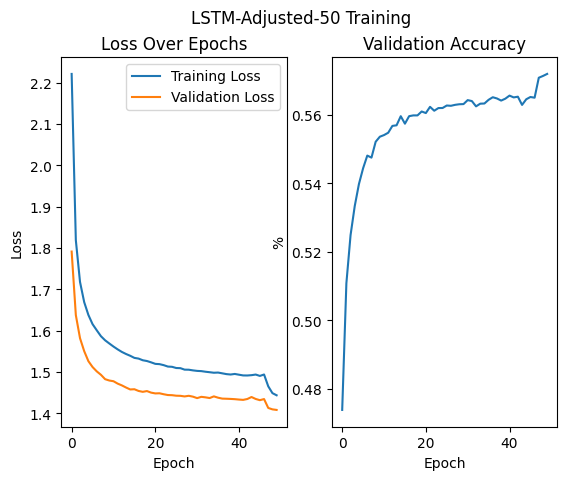

In [3]:
lstmadj_50 = ShakespeareRNN(
    alphabet_size=len(data_50['chars']),
    hidden_size=100,
    rnn=nn.LSTM,
    linear_network=[128,64],
    dropout=0.3
).to('cuda')
models.append(lstmadj_50)

train_and_plot(
    data_50['train_loader'],
    data_50['val_loader'],
    lstmadj_50,
    "LSTM-Adjusted-50",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.01},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)


# GRU-50

Training GRU-50
Model has 115777 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      8.469410      |      2.716839      |      2.254251      |     -17.026712     |     35.971310      |      0.000000      |    1.462430e-07    |      4.963742      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      5.450632      |      2.117841      |      2.006862      |     -5.240198      |     41.645187      |     15.773338      |    5.530818e-08    |      5.151242      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 115777 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

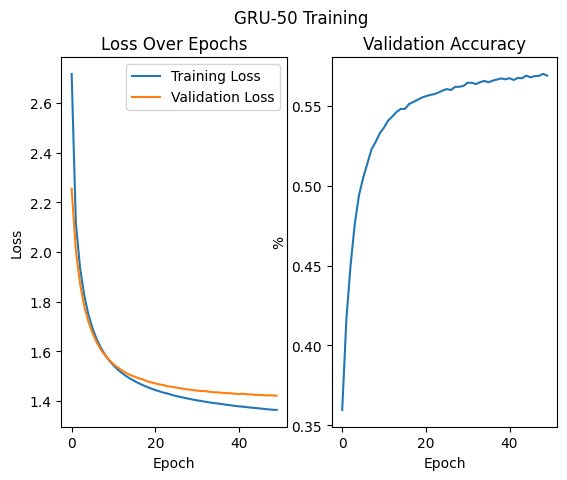

In [3]:
for model in models:
    del model
gru_50 = ShakespeareRNN(
    alphabet_size=len(data_50['chars']),
    hidden_size=128,
    rnn=nn.GRU,
).to('cuda')

models.append(gru_50)

train_and_plot(
    data_50['train_loader'],
    data_50['val_loader'],
    gru_50,
    "GRU-50",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# GRU-Adjusted-50

Training GRU-Adjusted-50
Model has 176477 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   | Avg Inference Time |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      9.989033      |      2.045458      |      1.695221      |     -17.122666     |     49.156113      |      0.000000      |    3.408571e-07    |      1.829890      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      6.363461      |      1.688703      |      1.579056      |     -6.492958      |     51.927379      |      5.637682      |    1.293319e-06    |      2.017390      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 176477 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

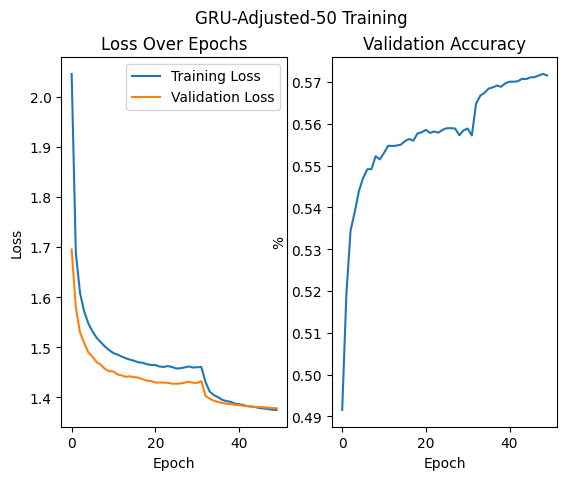

In [3]:
gru_adj_50 = ShakespeareRNN(
    alphabet_size=len(data_50['chars']),
    hidden_size=100,
    rnn=nn.GRU,
    linear_network=[256,256],
    dropout=0.3
).to('cuda')
models.append(gru_adj_50)
train_and_plot(
    data_50['train_loader'],
    data_50['val_loader'],
    gru_adj_50,
    "GRU-Adjusted-50",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.01},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)